# Ecuaciones diferenciales con `Python`
Mientras que algunos problemas de Ecuaciones diferenciales ordinarias se pueden resolver con métodos analíticos, como deben haber visto en cátedra, son mucho más comunes los problemas que no se pueden resolver analíticamente. Por lo tanto, en estos casos debemos recurrir a los métodos numéricos. Es aquí, dónde el poder de las computadoras y en especial, de los paquetes científicos de `Python` como `NumPy`, `Matplotlib`, `SymPy` y `SciPy`, se vuelven sumamente útiles. Veamos como podemos utilizar la fuerza computacional para resolver Ecuaciones diferenciales.

## Soluciones analíticas con `Python`
`SymPy` nos proporciona un solucionador genérico de Ecuaciones diferenciales ordinarias, `sympy.dsolve`, el cual es capaz de encontrar soluciones analíticas a muchas EDOs elementales. Mientras `sympy.dsolve` se puede utilizar para resolver muchas EDOs sencillas simbólicamente, como veremos a continuación, debemos tener en cuenta que la mayoría de las EDOs no se pueden resolver analíticamente. Por ejemplo, retomando el ejemplo que resolvimos analíticamente más arriba, veamos si llegamos al mismo resultado utilizando `SymPy` para solucionar la siguiente Ecuación diferencial ordinaria:

$$\dfrac{dy}{dx}=-3x^2y+6x^2$$

Para ello, primero definimos:
* la variable $x$ utilizando el objeto `Symbol`.
* la variable $y$, que al ser una función, obviamente debe definirse como objeto `Function`.

Luego expresamos en `Python` la ecuación que define a la función:

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from scipy import integrate
sp.init_printing(use_latex='mathjax') # Importamos el módulo de latex para imprimir con notación matemática.

# Resolviendo ecuación diferencial
# defino las incognitas
x = sp.Symbol('x', real=True )
y = sp.Function('y')

# expreso la ecuacion
f = 6*x**2 - 3*x**2*(y(x))

#Python no tiene ni dy ni dx

# para definir la ecuacion diferencial, se usa .diff(x) para indicar la derivada respecto a x y en vez de signo "="
# se usa una ","
sp.Eq(y(x).diff(x), f)

d               2           2
──(y(x)) = - 3⋅x ⋅y(x) + 6⋅x 
dx                           

 Ahora sólo falta aplicar la función `dsolve` para resolver nuestra EDO:

In [100]:
# Resolviendo la ecuación
#                dy/dx - f = 0
sp.dsolve(y(x).diff(x) - f)

             3    
           -x     
y(x) = C₁⋅ℯ    + 2

Siguiendo el mismo procedimiento, podemos resolver otras EDOs. Consideremos el ejemplo visto en clases:

### Ejemplo 01

Determine la solución de la EDO:
$$(3x^2+6xy^2)dx+(6x^2y+4y^3)dy=0.$$

Para resolver la EDO usando `Python` realizamos el siguiente procedimiento:

In [101]:
g=3*x**2+6*x*y(x)**2+(6*x**2*y(x)+4*y(x)**3)*y(x).diff(x) #declaramos la función
g #la imprimimos para revisar que no hemos cometido errores de tipeo

   2        2      ⎛   2           3   ⎞ d       
3⋅x  + 6⋅x⋅y (x) + ⎝6⋅x ⋅y(x) + 4⋅y (x)⎠⋅──(y(x))
                                         dx      

In [102]:
#resuelve una ecuacion diferencial
#sp.dsolve(g,0) #la resolvemos

In [103]:
import sympy
print(sympy.__version__)

1.13.2


El resultado que hemos obtenido parece difícil de interpretar, pero si revisamos la resolución vista en clases:

$$x^3+3x^2y^2+y^4=C, \quad\quad\quad c\in\mathbb{R}$$

podemos pensar que hay algún error, sin embargo si despejamos $y$ en términos de $x$, en el ejemplo anterior, tendremos: 

In [104]:
from sympy.abc import C #identificamos a C como una constante simbólica

#despeja una variable arbitraria de una ecuación que definamos de una ecuacion ordinaria 
                                       #se  despeja en terminos de y(x)
sp.solve(x**3+3*x**2*y(x)**2+y(x)**4-C,y(x)) #resolvemos la ecuación en términos de y(x)

⎡       _________________________________        _____________________________ ↪
⎢      ╱             ___________________        ╱             ________________ ↪
⎢     ╱       2     ╱          4      3        ╱       2     ╱          4      ↪
⎢    ╱     3⋅x    ╲╱  4⋅C + 9⋅x  - 4⋅x        ╱     3⋅x    ╲╱  4⋅C + 9⋅x  - 4⋅ ↪
⎢-  ╱    - ──── - ────────────────────── ,   ╱    - ──── - ─────────────────── ↪
⎣ ╲╱        2               2              ╲╱        2               2         ↪

↪ ____         _________________________________        ______________________ ↪
↪ ___         ╱             ___________________        ╱             _________ ↪
↪  3         ╱       2     ╱          4      3        ╱       2     ╱          ↪
↪ x         ╱     3⋅x    ╲╱  4⋅C + 9⋅x  - 4⋅x        ╱     3⋅x    ╲╱  4⋅C + 9⋅ ↪
↪ ─── , -  ╱    - ──── + ────────────────────── ,   ╱    - ──── + ──────────── ↪
↪        ╲╱        2               2              ╲╱        2               2  ↪

↪ ___________⎤
↪ _________

Notamos que son el mismo resultado!

Notamos también que debemos que ser capaces de identificar cuando los resultados son iguales, a pesar de que las expresiones se representen de manera diferente.

## Comprobación

Podemos comprobar los resultados de nuestros cálculos con la ayuda de Python. Consideremos para ello el siguiente ejemplo:

### Ejemplo 02

Resolver la EDO vista en clases:

$$\dfrac{dy}{dx} =3x^2y \quad\quad\quad\quad y(1)=2$$

Compruebe sus resultados.

Para ello primero declaramos la ecuación:

In [105]:
#esto es para verificar si esta bien declarada
Eq = sp.diff(y(x),x)-3*x**2*y(x)
Eq
#sp.dsolve(Eq, ics={y(1):2})

     2        d       
- 3⋅x ⋅y(x) + ──(y(x))
              dx      

La resolvemos:
($y(x)$ es la solución general de la EDO).

In [106]:
#se resuelve la ecuación diferencial
sp.dsolve(Eq)

           ⎛ 3⎞
           ⎝x ⎠
y(x) = C₁⋅ℯ    

Ahora calculamos la constante con la ayuda de la condición inicial (Aquí $y(x)$ es la solución particular):

In [107]:
#se resuelve la ecuación diferencial con condiciones iniciales
#solucion particular explicita
#se puede cambiar el valor inicial
sp.dsolve(Eq, ics={y(1):2})

              ⎛ 3⎞
          -1  ⎝x ⎠
y(x) = 2⋅ℯ  ⋅ℯ    

Para comprobar nuestros resultados, debemos despejar variables (pues la ecuación es de variables separables):
$$\dfrac{dy}{y}= 3x^2dx$$

Adenás debemos recordar que si $F'(x)=f(x)$, entonces:

$$\int f(x)dx=F(x)+C.$$

Por tanto si consideramos:

$$f(y)=\dfrac{1}{y}\quad\quad\quad\quad g(x)=3x^2,$$
    
tendremos que:

$$\int f(y)dy=\int g(x)dx$$

Para calcular en `Python` definimos las funciones y las integramos:

In [108]:
f = 1/x #usamos la variavle x, porque ya hemos definido y como función.
sp.integrate(f,x)

log(x)

In [109]:
g=3*x**2
sp.integrate(g,x)

 3
x 

Tendremos entonces:

$$\ln(y)=x^3+c,$$

despejando $y(x)$, tendremos:

In [110]:
e=sp.log(y(x))-x**3+C
res=sp.solve(e,y(x))
res

⎡       3⎤
⎢ -C + x ⎥
⎣ℯ       ⎦

Expresión que corresponde a la solución general de la EDO!!.

### Ejercicio 01:

En `Python` podemos declarar $\sqrt[3]{2}$ de diferentes formas:
* `2**(1/3)` mediante potencias.
* `np.cbrt(2)` mediante el uso de la libreria `numpy`.
* `sp.cbrt(2)` mediante el uso de la libreria `sympy`.

Defina $\sqrt[3]{2}$ usando las formas que se presentan y describa porqué son diferentes. Recuerde registrar su desarrollo de la forma más ordenada y coherente posible.  

In [111]:
raiz1 = 2 ** (1/3)
raiz1

1.2599210498948732

In [112]:
raiz2 = np.cbrt(2)
raiz2

1.259921049894873

In [113]:
raiz3 = sp.cbrt(2)
raiz3

3 ___
╲╱ 2 

### Ejercicio 02

Para trabajar este ejercicio debe notar que al definir las variables, en `Python` obtendrá resultados diferentes si la define como `y=sp.Symbol("y", real= True)` o como `y=sp.Symbol("y")`.

Ahora considere la EDO autónoma:

$$(y^5 - 6 y^4 - 5 y^3 - 10 y^2 - 36 y + 56)dx+(y^2+1)dy = 0$$

* a) Encuentre sus puntos estacionarios usando `y=sp.Symbol("y", real= True)`.
* b) Encuentre sus puntos estacionarios usando `y=sp.Symbol("y")`.
* c) Explique porqué se obtienen resultados diferentes. 

Recuerde registrar su desarrollo de la forma más ordenada y coherente posible.  

In [114]:
y = sp.Symbol("y", real= True)
sp.solve(-y**5+6*y**4+5*y**3+10*y**2+36*y-56)

[-2, 1, 7]

In [115]:
y=sp.Symbol("y")
sp.solve(-y**5+6*y**4+5*y**3+10*y**2+36*y-56)

[-2, 1, 7, -2⋅ⅈ, 2⋅ⅈ]

### Ejercicio 03

Para trabajar este ejercicio debe notar que al buscar soluciones periódicas de ecuaciones diferenciales que involucran funciones trigonométricas la función `sp.solve(#ecuación#,#variable)` entregará un resultado limitado al argumento principal, mientras que la función `sp.solveset(#ecuación#,#variable)` nos entrega un panorama más amplio. Debemos notar sin embargo que `sp.solveset()` no pone atención en las restricciones de la función.

Ahora considere la EDO

$$\sin y \sqrt{y-1} dx - (x^2-1)dy = 0 $$

* a) Encuentre las soluciones estacionarias de la EDO usando `sp.solve()`.
* b) Encuentre las soluciones estacionarias de la EDO usando `sp.solveset()`.
* c) Explique porqué se obtienen resultados diferentes y qué ventajas tiene cada método.

Recuerde registrar su desarrollo de la forma más ordenada y coherente posible.  

In [116]:
sp.init_printing(use_latex='mathjax')
#sp.Sin
#sp.cos
#sp.sqrt
y = sp.Symbol("y")
x = sp.Symbol("x")

f = sp.sin(y)*sp.sqrt(y-1)/(x**2-1)

sp.Eq(0, f)
sp.solve(f,y)

[0, 1, π]

In [117]:
sp.solveset(f, y, domain=sp.S.Reals) #resolvemos la ecuación en el dominio de los números reales

{1} ∪ {2⋅n⋅π │ n ∊ ℤ} ∪ {2⋅n⋅π + π │ n ∊ ℤ}

C:\Users\nelof\AppData\Local\Temp\ipykernel_21892\1703602461.py:6: RuntimeWarning: divide by zero encountered in divide
  V = np.sin(Y)*np.sqrt(Y-1)/(X**2-1) #f(x,y)
C:\Users\nelof\AppData\Local\Temp\ipykernel_21892\1703602461.py:6: RuntimeWarning: invalid value encountered in divide
  V = np.sin(Y)*np.sqrt(Y-1)/(X**2-1) #f(x,y)
C:\Users\nelof\AppData\Local\Temp\ipykernel_21892\1703602461.py:10: RuntimeWarning: invalid value encountered in divide
  V = V / N


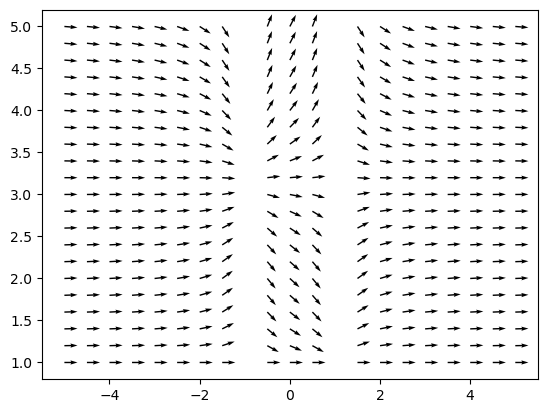

In [118]:
import numpy as np
import matplotlib.pyplot as plt
X,Y=np.meshgrid(np.linspace(-5,5,21), np.linspace(1,5,21))

U = 1.0
V = np.sin(Y)*np.sqrt(Y-1)/(X**2-1) #f(x,y)

N = np.sqrt(U ** 2 + V ** 2)#Normalizamos los vectores
U = U / N
V = V / N

plt.quiver(X, Y, U, V) #graficamos los vectores con origen en (x,y) y término (u,v)
plt.show()

### Ejercicio 04

Resolver el PVI
$$\dfrac{dy}{dx} - y = 2e^x y^2 \quad ; \quad y(1)=\pi.$$

Recuerde registrar su desarrollo de la forma más ordenada y coherente posible.  

In [119]:
x = sp.Symbol('x', real=True)
y = sp.Function('y')

Eq = sp.diff(y(x),x)-y(x)-2*sp.exp(x)*y(x)**2
Eq


     2     x          d       
- 2⋅y (x)⋅ℯ  - y(x) + ──(y(x))
                      dx      

In [120]:
sp.dsolve(Eq, ics={y(1):sp.pi})

               x        
              ℯ         
y(x) = ─────────────────
                       2
          2⋅x   ℯ + π⋅ℯ 
       - ℯ    + ────────
                   π    

### Ejercicio 05

Considere la siguiente EDO:

$$\left[ \dfrac{\ln(\ln(y))}{x}+\dfrac{2}{3}xy^3+6x \right] dx+ \left[\dfrac{\ln(x)}{y\ln(y)}+x^2y^2+4e^{-2y} \right]dy=0.$$

* a) Verifique si es exacta.
* b) Resuelva la ecuación.

Recuerde registrar su desarrollo de la forma más ordenada y coherente posible.  

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from scipy import integrate
sp.init_printing(use_latex='mathjax') # Importamos el módulo de latex para imprimir con notación matemática.



In [122]:
x = sp.Symbol('x', real=True )
y = sp.Symbol('y')

f = (sp.log(sp.log(y))/x) + ((2/3)*x*y**3) + (6*x)
sp.diff(f,y) #la ecuación diferencial

       2       1     
2.0⋅x⋅y  + ──────────
           x⋅y⋅log(y)

In [123]:
x = sp.Symbol('x', real=True )
y = sp.Symbol('y')

f = (sp.log(x)/(y*sp.log(y))) + (x**2*y**2) + (4*sp.exp(-2*y))
sp.diff(f,x) #la ecuación diferencial

     2       1     
2⋅x⋅y  + ──────────
         x⋅y⋅log(y)

B:


$$\left[ \dfrac{\ln(\ln(y))}{x}+\dfrac{2}{3}xy^3+6x \right] dx+ \left[\dfrac{\ln(x)}{y\ln(y)}+x^2y^2+4e^{-2y} \right]dy=0.$$


In [126]:
x = sp.Symbol('x', real=True )
y = sp.Function('y')

Eq = y(x).diff(x) + (((sp.log(sp.log(y(x)))/x) + ((2/3)*x*y(x)**3) + (6*x)) / ((sp.log(x)/(y(x)*sp.log(y(x)))) + (x**2*y(x)**2) + (4*sp.exp(-2*y(x)))))
Eq

                     3            log(log(y(x)))           
0.666666666666667⋅x⋅y (x) + 6⋅x + ──────────────           
                                        x          d       
──────────────────────────────────────────────── + ──(y(x))
      2  2         -2⋅y(x)       log(x)            dx      
     x ⋅y (x) + 4⋅ℯ        + ──────────────                
                             y(x)⋅log(y(x))                

In [ ]:
sp.dsolve(Eq)